In [3]:
# some imports
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt

In [4]:
# Reading train.csv and separating labels from train data
from keras.utils import to_categorical
train = pd.read_csv("train.csv")
y = train["label"]
train = train.drop(["label"], axis=1)
train = train / 255.0
train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Converting table data to tensor
train = tf.reshape(train, shape=(-1, 28, 28, 1))

In [6]:
# loading mnist data
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

x_train1 = np.concatenate([x_train1, x_test1], axis=0)
y_train1 = np.concatenate([y_train1, y_test1], axis=0)

# scaling mnist data
x_train1 = x_train1 / 255.0

x_train1 = tf.reshape(x_train1, shape=(-1, 28, 28, 1))

In [7]:
x_train = np.concatenate((train, x_train1))
y_train = np.concatenate((y, y_train1))

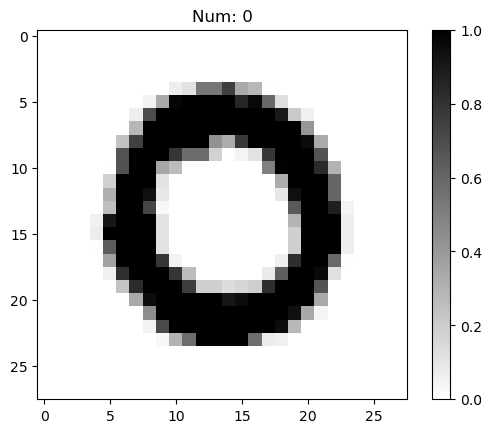

In [8]:
# Visualizing one element from train data
plt.imshow(x_train[1], cmap='binary')
plt.title(f"Num: {y_train[1]}")
plt.colorbar()

In [9]:
test = pd.read_csv("test.csv")
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = test / 255.0
test = tf.reshape(test, shape=(-1, 28, 28, 1))
test

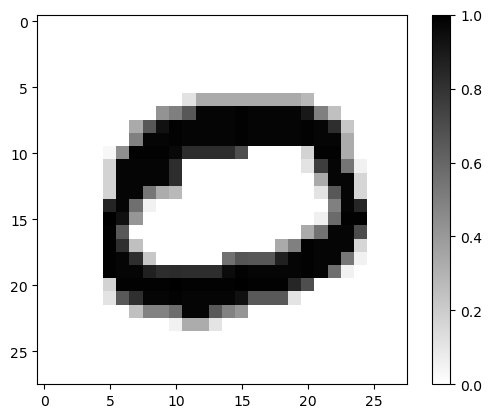

In [11]:
plt.imshow(test[1], cmap='binary')
plt.colorbar()

In [12]:
# train/test split
from sklearn.model_selection import train_test_split
# train = tf.random.shuffle(train, seed=42)
# y = tf.random.shuffle(y, seed=42)
y_train = to_categorical(y_train, num_classes=10)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Creating model without data augmentation

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import plot_model
from tensorflow.keras.layers.experimental import preprocessing

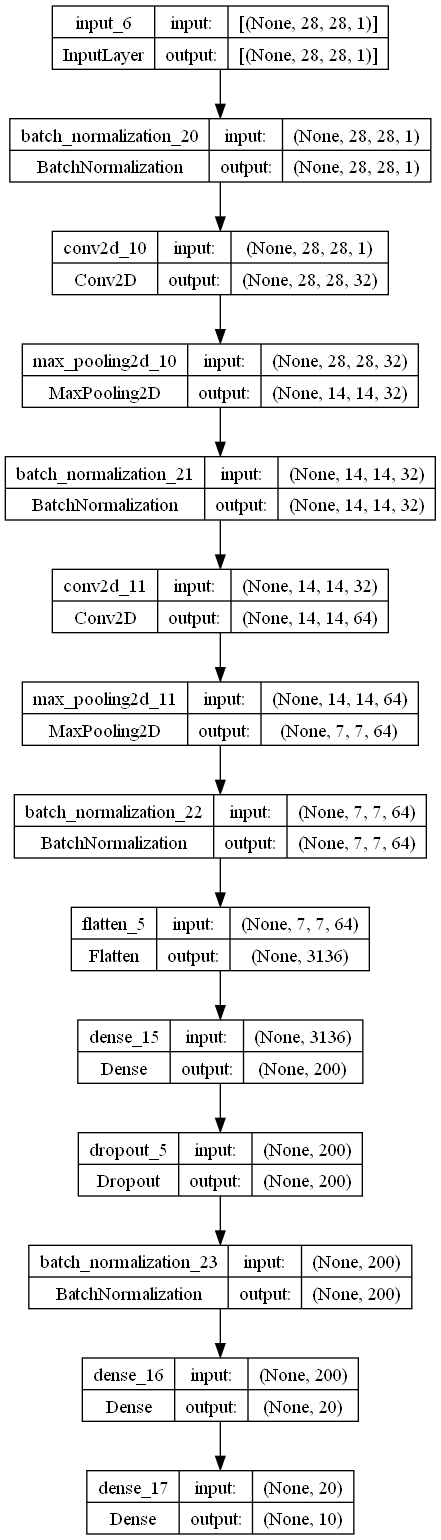

In [30]:
model = tf.keras.models.Sequential([
    layers.InputLayer(input_shape=[28, 28, 1]),
    
    # Data Augmentation
    # preprocessing.RandomContrast(factor=0.10),
    # preprocessing.RandomRotation(factor=0.15),
    # preprocessing.RandomTranslation(height_factor=0.15, width_factor=0.15),
    # preprocessing.RandomWidth(factor=0.25),
    # preprocessing.RandomHeight(factor=0.25),

    # Block One
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Two
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.BatchNormalization(renorm=True),
    layers.Flatten(),

    layers.Dense(200, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(renorm=True),

    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

plot_model(model, show_shapes=True, show_layer_names=True)


In [31]:
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#         rotation_range=15,
#         zoom_range=0.15,
#         width_shift_range=0.15,
#         height_shift_range=0.15)

# train_gen = datagen.flow(x_train, y_train, batch_size=256)

In [33]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 3)

Epoch 1/3
2800/2800 [==============================] - 44s 16ms/step - loss: 0.0454 - accuracy: 0.9866 - val_loss: 0.0317 - val_accuracy: 0.9901
Epoch 2/3
2800/2800 [==============================] - 44s 16ms/step - loss: 0.0346 - accuracy: 0.9912 - val_loss: 0.0236 - val_accuracy: 0.9932
Epoch 3/3
2800/2800 [==============================] - 44s 16ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0236 - val_accuracy: 0.9926


In [124]:
best_model = model

In [ ]:
result = best_model.predict(test)
result = np.argmax(result, axis=1)
result = pd.Series(result, name="Label")
submission = pd.concat([pd.Series(range(1, 28001), name="ImageId"), result], axis=1)
submission.to_csv("result.csv", index=False)